In [1]:
import pickle
import pandas as pd

with open('my_dataframe_newfeatures.pickle','rb') as read_file:
    df_target = pickle.load(read_file)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [3]:
import numpy as np

def get_user_split_data(df, test_size=.2, seed=42):

    rs = np.random.RandomState(seed)
    
    total_users = df['card_id'].unique() 
    test_users = rs.choice(total_users, 
                           size=int(total_users.shape[0] * test_size), 
                           replace=False)

    df_tr = df[~df['card_id'].isin(test_users)]
    df_te = df[df['card_id'].isin(test_users)] 

    y_tr, y_te = df_tr['target_binned'], df_te['target_binned']
#     X_tr = df_tr[['merchant_category_id','month_lag','category_2','rolling_sum','date_month','day_of_week','hour',
#               'purchase_amount_month_mean','purchase_amount_month_count', 'purchase_amount_dayofweek_mean','purchase_amount_dayofweek_count',
#               'purchase_amount_hour_mean','purchase_amount_hour_count','month_diff', 'elapsed_time', 'order_freq', 'total_usage', 'amount_per_use']] 
#     X_te = df_te[['merchant_category_id','month_lag','category_2','rolling_sum','date_month','day_of_week','hour',
#               'purchase_amount_month_mean','purchase_amount_month_count', 'purchase_amount_dayofweek_mean','purchase_amount_dayofweek_count',
#               'purchase_amount_hour_mean','purchase_amount_hour_count','month_diff', 'elapsed_time', 'order_freq', 'total_usage', 'amount_per_use']] 
    
#     X_tr = df_tr[['purchase_amount_month_mean','purchase_amount_month_count','installments','purchase_amount','category_2','feature_2_2', 'feature_2_3', 'feature_3_1','auth_flag_Y', 'month_diff', 'elapsed_time', 'order_freq', 'total_usage', 'amount_per_use']] 
#     X_te = df_te[['purchase_amount_month_mean','purchase_amount_month_count','installments','purchase_amount','category_2','feature_2_2', 'feature_2_3', 'feature_3_1','auth_flag_Y', 'month_diff', 'elapsed_time', 'order_freq', 'total_usage', 'amount_per_use']] 
    
#     return X_tr, X_te, y_tr, y_te

    X_tr = df_tr[['order_freq','elapsed_time', 'amount_per_use']] 
    X_te = df_te[['order_freq','elapsed_time', 'amount_per_use']] 
    
    return X_tr, X_te, y_tr, y_te

X_tr, X_te, y_tr, y_te = get_user_split_data(df_target)


In [4]:
randomforest_model = RandomForestClassifier()
randomforest = randomforest_model.fit(X_tr, y_tr) 
ranfor_predictions = randomforest.predict(X_te)


# creating a confusion matrix 
cm = confusion_matrix(y_te, ranfor_predictions) 

/Users/zhaoze/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [5]:
cm

array([[ 104477,  378963,   62191],
       [ 299481, 1302396,  170700],
       [  81294,  268947,   57843]])

In [6]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=18):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names, )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)
    return fig

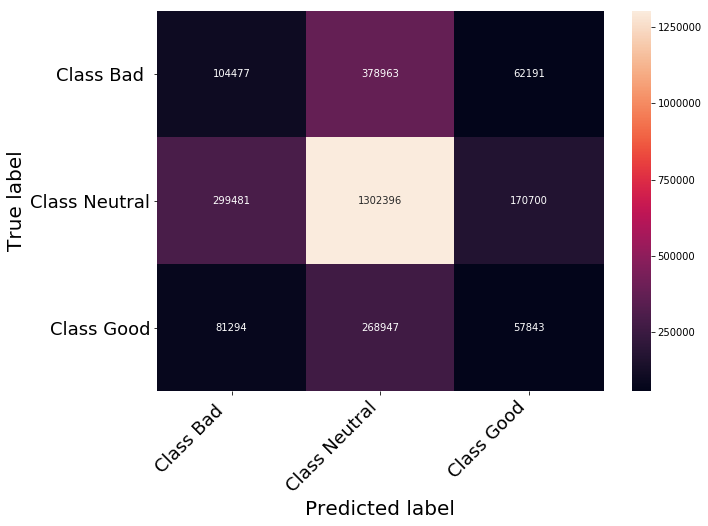

In [7]:
import seaborn as sns
cm = print_confusion_matrix(confusion_matrix(y_te, ranfor_predictions), ['Class Bad ', 'Class Neutral', 'Class Good'])

In [1]:
57843 / (57843 + 268947 + 81294)

0.14174287646660982

In [18]:
57843 / (62191 + 170700 + 57843)

0.19895505857588036

In [8]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
accuracy_score(ranfor_predictions, y_te)

0.537255730494019

In [9]:
import pickle

with open("randomforest.pkl", "wb") as f:
    pickle.dump(randomforest, f)

In [10]:
randomforest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
import pickle

with open("randomforest_model.pkl", "wb") as f:
    pickle.dump(randomforest_model, f)

In [12]:
import pickle
import pandas as pd

with open('lr.pkl','rb') as read_file:
    lr_predict = pickle.load(read_file)

/Users/zhaoze/anaconda3/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.20.0 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [13]:
lr_predict

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='auto', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [14]:
randomforest_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
randomforest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
lr_predict.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']